In [2]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '3'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from signal_utils_1D import *
from plot_utils_1D import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
N_objects = 2000
noise_sigma = 1e-3

erasure_mask = onp.ones(NUM_NYQUIST_SAMPLES)
erasure_mask = np.array(erasure_mask, dtype=bool)
sampling_indices = (1, 2)

num_deltas_list = 2 ** np.arange(0, 10)
mutual_informations = []
for num_deltas in num_deltas_list:
    objects_fn = lambda : np.array([sample_amplitude_object('delta', num_deltas=num_deltas) * num_deltas for i in range(N_objects)])

    initial_kernel, initial_params, optimized_params, objects, initial_mi, optimized_mi = optimize_PSF_and_estimate_mi(objects_fn, noise_sigma, erasure_mask)
    
    mutual_informations.append(optimized_mi)

initial loss -3.945782964360733
initial loss -4.619002270350876
initial loss -5.020343913624291
initial loss -5.264460073648481
initial loss -5.790384801710966
initial loss -6.171543241760202
initial loss -6.644043534816957
initial loss -7.393350738887888


KeyboardInterrupt: 

In [9]:
len(mutual_informations)

7

Text(0, 0.5, 'mutual information')

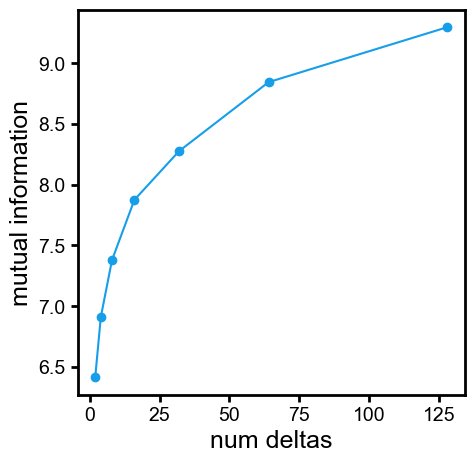

In [10]:

# plot num_deltas vs mutual information
plt.figure(figsize=(5, 5))
plt.plot(num_deltas_list[:len(mutual_informations)], mutual_informations, 'o-')
plt.xlabel('num deltas')
plt.ylabel('mutual information')